In [1]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.patches as mpatches
import textwrap

In [2]:
#Create a path to the csv and put it into Pandas DataFrame
csv_path = Path("Resources/Impact_of_Remote_Work_on_Mental_Health.csv")
remote_work_mental_health_df = pd.read_csv(csv_path)

remote_work_mental_health_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
#Filter Dataframe to only include Results from North America
filtered_df = remote_work_mental_health_df[remote_work_mental_health_df["Region"] == "North America"]

filtered_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America


In [4]:
#Group the data by work location and find the average response for social isolation rating
Average_Social_Isolation = filtered_df.groupby("Work_Location")["Social_Isolation_Rating"].mean()

print(Average_Social_Isolation)

Work_Location
Hybrid    2.996169
Onsite    3.027778
Remote    3.011364
Name: Social_Isolation_Rating, dtype: float64


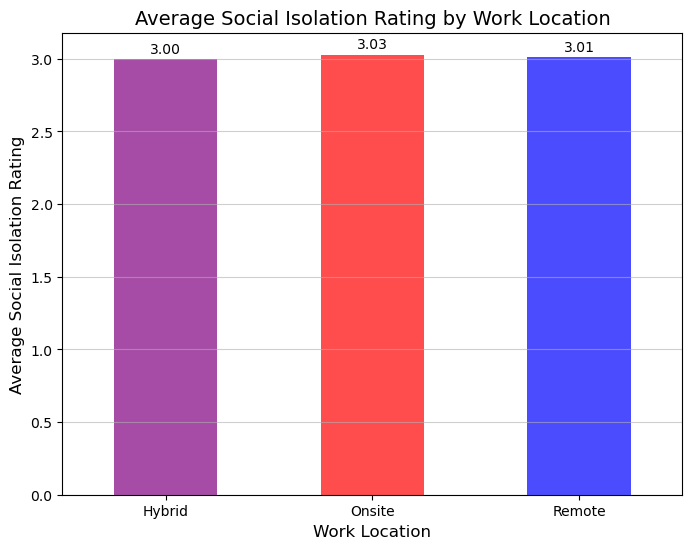

In [5]:
#plot the bar graph for social isolation rating average by work location

#Create Bar Graph
Average_Social_Isolation.plot(
    kind="bar",
    color=["Purple", "Red", "Blue"], alpha=0.7,
    figsize=(8,6)
)

#Display Means on Bars
for i, value in enumerate(Average_Social_Isolation):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

#customize the chart
plt.title("Average Social Isolation Rating by Work Location", fontsize=14)
plt.xlabel("Work Location", fontsize=12)
plt.ylabel("Average Social Isolation Rating", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", alpha=0.6)

plt.show()

<Figure size 800x600 with 0 Axes>

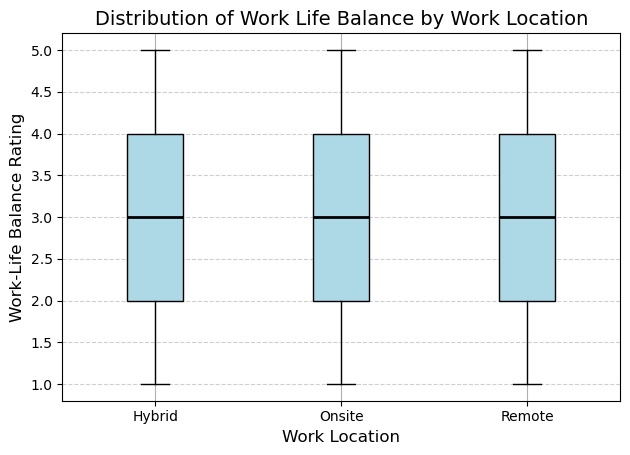

In [6]:
# Create a boxplot for work life balance by work location

plt.figure(figsize=(8, 6))

# Create the boxplot
filtered_df.boxplot(column="Work_Life_Balance_Rating", by="Work_Location", 
             patch_artist=True,  
             boxprops=dict(facecolor="lightblue", color="black"), 
             whiskerprops=dict(color="black"),  
             capprops=dict(color="black"),  
             flierprops=dict(markerfacecolor="red", marker="o", markersize=6),  
             medianprops=dict(color="black", linewidth=2))  


# Customize the plot
plt.title("Distribution of Work Life Balance by Work Location", fontsize=14)
plt.suptitle('')  
plt.xlabel("Work Location", fontsize=12)
plt.ylabel("Work-Life Balance Rating", fontsize=12)
plt.xticks([1, 2, 3], ["Hybrid", "Onsite", "Remote"], fontsize=10)
plt.yticks(range(1, 6), fontsize=10)  # Ratings from 1 to 5
plt.grid(axis="y", linestyle='--', alpha=0.6)

# Set smaller increments for the y-axis scale
plt.yticks(np.arange(1, 5.1, 0.5), fontsize=10)  # Ratings from 1 to 5 with 0.5 increments

# Ensure the y-axis labels are aligned correctly with the box plots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
#create filtered dataframe for social isolation and work life balance
social_isolation_wl_balance_df = filtered_df[["Work_Life_Balance_Rating", "Social_Isolation_Rating"]]

social_isolation_wl_balance_df

,Work_Life_Balance_Rating,Social_Isolation_Rating
2,5,4
4,2,3
7,3,5
9,1,2
13,1,2
...,...,...
4930,2,1
4932,5,1
4938,1,4
4950,4,3


In [9]:
#Prepare Dataframe to count occurances by how often they occure
df = pd.DataFrame(social_isolation_wl_balance_df)

In [10]:
#Count occures of each corresponding data point 
df["Count"] = df.groupby(["Social_Isolation_Rating", "Work_Life_Balance_Rating"])["Social_Isolation_Rating"].transform("count")
df

,Work_Life_Balance_Rating,Social_Isolation_Rating,Count
2,5,4,34
4,2,3,28
7,3,5,34
9,1,2,28
13,1,2,28
...,...,...,...
4930,2,1,38
4932,5,1,34
4938,1,4,31
4950,4,3,24


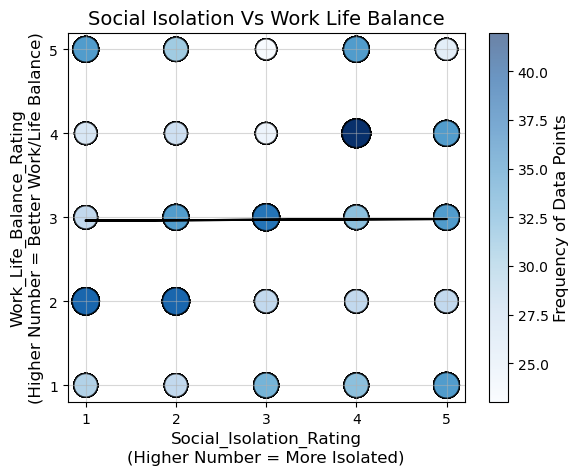

In [11]:
#create scatter plot
scatter =plt.scatter(
    df["Social_Isolation_Rating"],
    df["Work_Life_Balance_Rating"],
    s=df["Count"] * 10,
    alpha=0.6,
    c=df["Count"],
    cmap="Blues",
    edgecolor="black"
)

#add colorbar to show frequency
cbar = plt.colorbar(scatter)
cbar.set_label("Frequency of Data Points", fontsize=12)

#calculate trend line
x = df["Social_Isolation_Rating"]
y = df["Work_Life_Balance_Rating"]
m, b = np.polyfit(x, y, 1)

#add trend line to the scatter plot
plt.plot(x, m*x + b, color="black", label="Trend Line")

#add labels 
plt.title("Social Isolation Vs Work Life Balance", fontsize=14)
plt.xlabel("Social_Isolation_Rating\n(Higher Number = More Isolated)", fontsize=12)
plt.ylabel("Work_Life_Balance_Rating\n(Higher Number = Better Work/Life Balance)", fontsize=12)

#only show whole numbers on x&y axis
plt.xticks(np.arange(df["Social_Isolation_Rating"].min(), df["Social_Isolation_Rating"].max() + 1, 1))
plt.yticks(np.arange(df["Work_Life_Balance_Rating"].min(), df["Work_Life_Balance_Rating"].max() + 1, 1))

#display scatterplot
plt.grid(True, alpha=0.5)
plt.show()